In [ ]:
import numpy as np
a=np.array([[[2,3,4]],[[5,6,7]]])
a.size
b=np.array([0,1,2,3,4,5,6,7,8,9])   # size?--> 각 배열을 구성하는 최소 단위의 개수!
b.size

10

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)    # y 와 t를 10차원 벡터가 아닌 shape이 (1,10) 인 행렬로 만들어라! y-->11행,t-->8행(이유!)
        y = y.reshape(1, y.size)

    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

0.1999999999990898


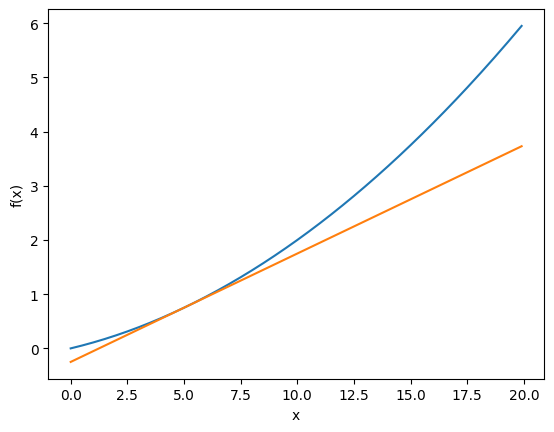

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
x = 2

def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y    # 19행의 해석?-->'t 에 대한 익명(이름이 없는)의 함수의 리턴값을 리턴해라!' , t 를 제외한 나머지 존재들은 상수취급! 즉 t가 주변수계!!
                                # lambda 는 내 변수에 관한 정리에 예외다!! (같은행논리에서 예외!) 또, t의 경우 임의성에 관한 언급이 없을시 최대로 본다!
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)     # 26 행은 15행 부터 차례대로 실행해서(따라서 17행의 print 함수가 실행됨!) 결국에 그 return 값을 tf 에 입력해라!의 의미임!
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()


In [ ]:
boong = numerical_diff(function_1, 5)

In [ ]:
x=np.arange(6)
x

array([0, 1, 2, 3, 4, 5])

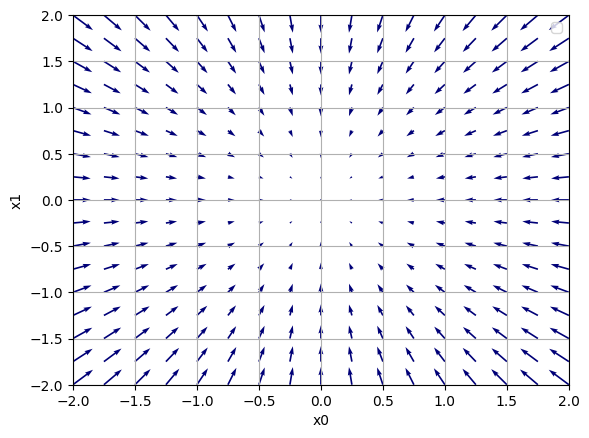

In [ ]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad


def function_2(x):      # x의 임의성에 대해 언급이 없으면 정의되는 한 최대치로 생각한다!
    if x.ndim == 1:
        return np.sum(x**2)     # 이때 x 는 변적인 관점을 취한 복소수를 원소로 갖는 벡터(행렬)!!
    else:
        return np.sum(x**2, axis=1)     # just x에 행렬이 입력되었을때의 대안을 마련해 놓은것 뿐!(함수에 행렬이 입력되면 당황하지 말고 임의의 한 행을 생각한 후 모두 제곱해 더하는 대응관ㄱ)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)

    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]) )

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#000077")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()


In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from functions import softmax, cross_entropy_error
from gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)


[[ 0.29534597  0.26057426 -0.55592023]
 [ 0.44301896  0.39086139 -0.83388035]]
[[ 0.69627901 -0.61723606 -1.40124489]
 [ 1.17657749 -0.242026   -0.75894394]]
